<h1>1.3. Sensibilidad no uniforme

In [1]:
import numpy as np

from convenience_functions import show_image
import image_sim as isim

<h1>1.3.2. Una imagen plana de muestra 

In [2]:
image = np.zeros([2000, 2000])
flat = isim.sensitivity_variations(image)

        Use RickerWavelet2D instead. [image_sim]


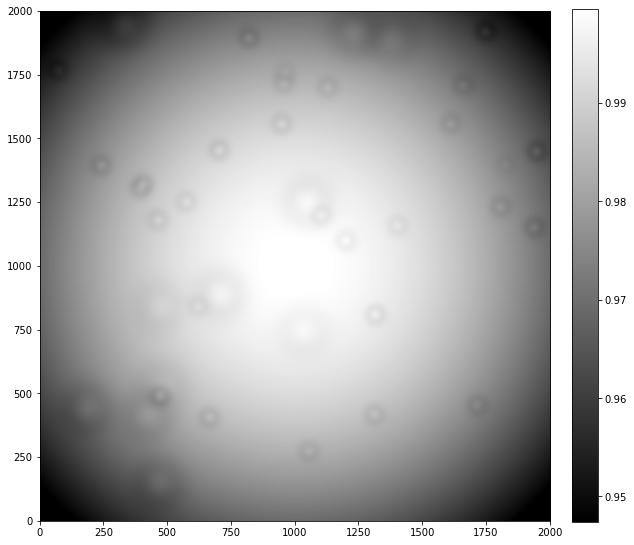

In [3]:
show_image(flat, cmap='gray')

<h1>1.3.3. Efecto de la sensibilidad no uniforme en las imágenes

<h1>1.3.4. Una imagen realista

In [4]:
gain = 1.0
exposure = 30.0
dark = 0.1
sky_counts = 20
bias_level = 1100
read_noise_electrons = 5
max_star_counts = 2000
bias_only = isim.bias(image, bias_level, realistic=True)
noise_only = isim.read_noise(image, read_noise_electrons, gain=gain)
dark_only = isim.dark_current(image, dark, exposure, gain=gain, hot_pixels=True)
sky_only = isim.sky_background(image, sky_counts, gain=gain)
stars_only = isim.stars(image, 50, max_counts=max_star_counts)

C:\Users\Saike\test\PracticaVeranoUCSC_2022\image_sim.py:120: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dark_im[[hot_y, hot_x]] = hot_current * exposure_time / gain


In [5]:
final_image = bias_only + noise_only + dark_only + flat * (sky_only + stars_only)

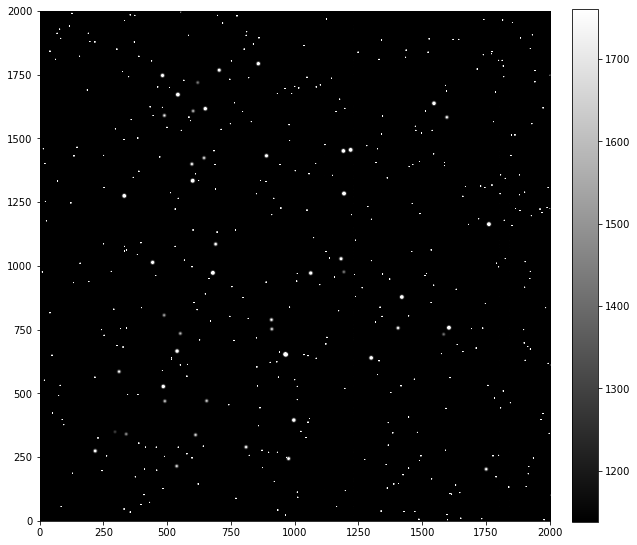

In [6]:
show_image(final_image, cmap='gray', percu=99.9)

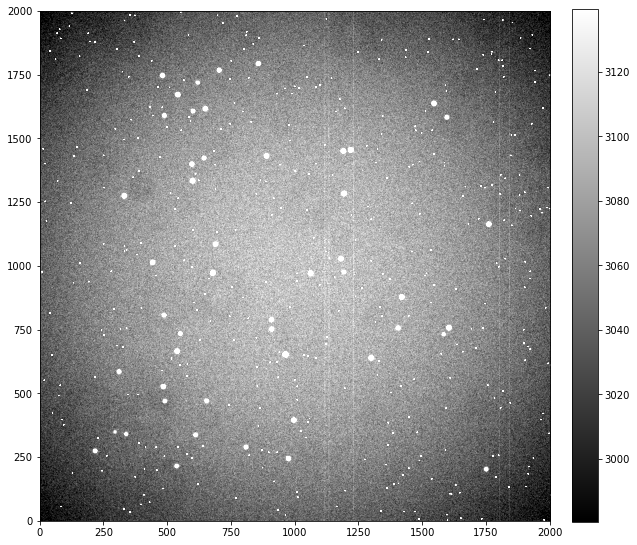

In [7]:
final_image2 = bias_only + noise_only + dark_only + flat * (isim.sky_background(image, 100 * sky_counts, gain=gain) + stars_only)
show_image(final_image2, cmap='gray')